## Author : Mahesh Kadam
## Task 1 Nov-21 batch, Data Science& Business Analytics Tasks, GRIP @ The Sparks Foundation
## Predict percentage of student based on the no. of study hours.
## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Shape of the data
df.shape 

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Summary statistics 
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Correlation Matrix
df.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


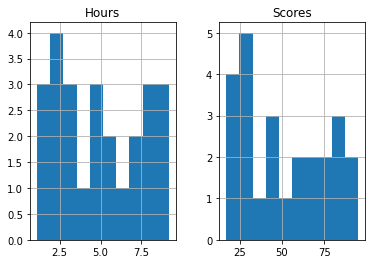

In [8]:
# To check distribution of variables
df.hist()
plt.show()

In [9]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

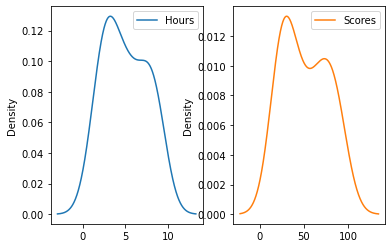

In [10]:
#Density Plot
df.plot(kind = 'density', subplots=True, sharex= False, sharey= False, layout=(1, 2), figsize = (6, 4))
plt.show()

## Data are fairly symmetric skewness betqeen -0.5 to 0.5

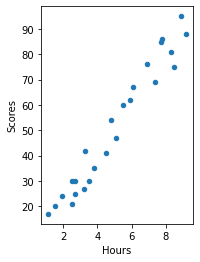

In [11]:
df.plot(x="Hours",y="Scores",kind = 'scatter', subplots=True, sharex= False, sharey= False, layout=(1, 2), figsize = (6, 4))
plt.show()

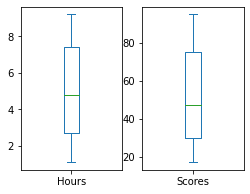

In [12]:
#To plot Box Plot
df.plot(kind = 'box', subplots=True, sharex= True, sharey=False, layout=(1, 2), figsize = (4, 3))
plt.show()

## outlier cant be seen from box plot shown above

## Model Building

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X = df.Hours # Training data / should be a 2D array
y = df.Scores # Target variable

In [15]:
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)
print(X.shape, y.shape)

(25, 1) (25, 1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [22]:
# train the model on training data:
reg = LinearRegression()
reg.fit(X_train,y_train) # Fitting model using training data

LinearRegression()

## Percentage Prediction

In [57]:
y_test_pred = reg.predict(X_test)

In [58]:
df1 = pd.DataFrame(y_test,columns=['Scores'])
df1['Predicted_Scores'] = y_test_pred
df1

,Scores,Predicted_Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluation Metrics

In [59]:
# Using inbuilt functions to calculate MSE and R_squared
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
#Root Mean Sqared Error: (Test Set)

print(np.sqrt(mean_squared_error(y_test,y_test_pred)))
print(r2_score(y_test,y_test_pred))

4.6474476121003665
0.9454906892105356


### around 94.5% total variablity of Scores variable is explained by Hours variable.

In [61]:
#Root Mean Sqared Error: (Train Set)

y_pred_train = reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(r2_score(y_train,y_pred_train))

5.558613350226342
0.9515510725211552


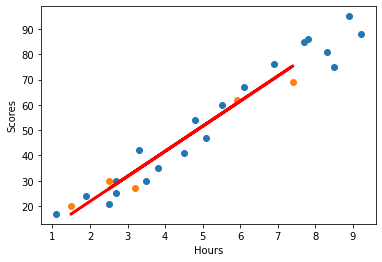

In [62]:
# To plot regression line
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.plot(np.array(X_test), y_test_pred, color = 'red', linewidth = 3)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Model Diagnostic

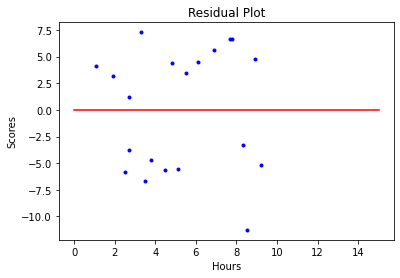

In [64]:
#Residual Plot
residual = y_train - y_pred_train
plt.plot(X_train, residual,  'b.')
plt.plot([0, 15],[0,0],'r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Residual Plot")
plt.show()

0.9035034347442901

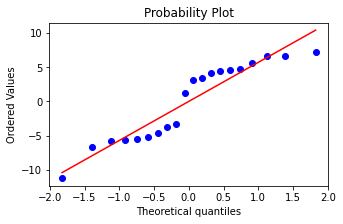

In [65]:
# Q-Q Plot to check the normality of residuals

residual = y_train - y_pred_train
import scipy as sp
fig, ax = plt.subplots(figsize=(5,3))
_, (__, ___, r) = sp.stats.probplot(residual.ravel(), plot=ax, fit=True)
r**2